#Calculate the slope $(\frac{dR}{dL})_{ii}$ from raw strain sweeps

1. Input the file name
2. Input the current, gain, and gauge factor
3. Set the correct column for samples, strain gauge and temperature/field
4. Determine the number of voltage loops to average over
5. Set the file name to save the plot

####The program then graphs the slope as a function of the tuning parameter.



In [2]:
%matplotlib inline 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

##1. Input File Name

In [7]:
openFileName = 'URu2Si2_test.dat'                 # <--- right here if it isn't obvious
datafile001 = np.array(np.loadtxt(openFileName))

##2. Input the experimental settings 
##3. Set the columns. Column variables all start with $\textit{col_}$
##4. Set the # of strain sweeps  to loop over (100 points per sweep). Variable is voltage_loops

In [8]:
#INPUT PARAMETERS HERE

col_sample_dV = 1
col_sample_V = 2

col_sg_dV = 5
col_sg_V = 6

current_sample = 1E-3
current_sg = 1E-3

gain_sample = 1000
gain_sg = 1

gauge_factor = 2.02

temp_col = 3

voltage_loops = 100

In [9]:
sample_dR = datafile001[:,col_sample_dV] / (current_sample*gain_sample) #sample dR
sample_R = datafile001[:,col_sample_V] / (current_sample*gain_sample) #sample R
sg_dR = datafile001[:,col_sg_dV] / (current_sg*gain_sg) #strain gauge dR
sg_R = datafile001[:,col_sg_V] / (current_sg*gain_sg) #strain gauge R
temperature = datafile001[:,temp_col]

In [10]:
dRdivR_sample = sample_dR / sample_R[0] # creates a dR/R
dRdivR_sg = sg_dR / sg_R[0] #creates a dR/R for the strain gauge

dLdivL = dRdivR_sg/gauge_factor #finds dL/L for strain gauge

In [11]:
#loop over every 100 points until end of array and find slope
#avg temperature over these points
#save slope and temperature
#If the fit is bad, output still works! Can easily clean
#    the bad slope data later

temp = []
slope = []

loop_counter = len(dLdivL)/voltage_loops

for i in np.arange(loop_counter):
    fit = np.polyfit(dLdivL[i*voltage_loops:(i+1)*voltage_loops], 
                     dRdivR_sample[i*voltage_loops:(i+1)*voltage_loops],1)
    
    #x = np.linspace(dLdivL[i*voltage_loops:(i+1)*voltage_loops].min(), 
    #                dLdivL[i*voltage_loops:(i+1)*voltage_loops].max())
    
    #y = fit[1] + fit[0]*x
    
    temp.append(np.mean(temperature[i*voltage_loops:(i+1)*voltage_loops]))
    slope.append(fit[0])



/home/scott/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/lib/polynomial.py:587: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/scott/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/lib/polynomial.py:587: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/scott/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/lib/polynomial.py:587: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/scott/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/lib/polynomial.py:587: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/scott/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/lib/polynomial.py:587: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/scott/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/numpy/lib/polynomial.py:587: RankWarning: 

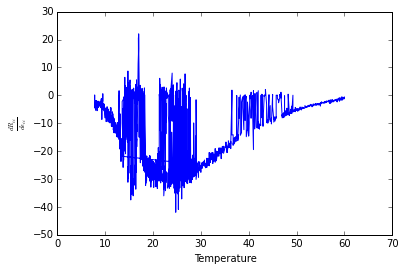

In [12]:
slopeTempData = np.asarray([temp,slope])
plt.figure()
plt.ylabel(r'$\frac{dR_{ii}}{d\epsilon_{ii}}$')
plt.xlabel('Temperature')
plt.plot(slopeTempData[0],slopeTempData[1])

##5. Set the save file name (and directory)

In [14]:
saveFileName = "URu2Si2TestData.csv"
np.savetxt(saveFileName, np.transpose(slopeTempData), delimiter=",")